<a href="https://colab.research.google.com/github/bellepoque7/2023-data-science-edu/blob/main/06-02%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%8B%A4%EC%8A%B5/%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D_%EB%82%A0%EC%94%A8_%EB%B3%80%ED%99%94%EC%97%90_%EB%94%B0%EB%A5%B8_%EA%B5%B0_%EA%B0%90%EC%98%81%EB%B3%8C_%EC%A0%95%EB%B3%B4_EDA_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94(%EC%A0%95%EB%8B%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [프로젝트] 날씨 변화에 따른 군 감영볌 정보 EDA 분석 및 데이터 시각화



---

## 프로젝트 목표
- 분기별 군 감염병(폐렴, 수두, 결핵 등) 현황 정보와 날씨 데이터를 활용하여 기온 변화에 따른 군 감염병과의 EDA 분석 및 시각화 프로젝트 수행

---

## 데이터 출처 
- https://www.data.go.kr/data/15083055/fileData.do (국방부 군 감염병 정보)
- https://data.kma.go.kr/data/grnd/selectAwsRltmList.do?pgmNo=56 (기상청 방재기상관측 자료)

---

## 프로젝트 개요

이번 프로젝트에서는 Pandas 및 Matplotlib를 사용하여 분기별 `군 감염병 현황 데이터`와 `기온 데이터`에 대한 탐색적 데이터 분석(EDA)를 적용하여 색인된 시간 순서로 질병과 기온 변수 레코드의 시계열 데이터를 시각화합니다.

탐색적 데이터 분석(EDA) 방법 및 데이터 시각화를 통하여 데이터의 분포와 값을 다양한 각도에서 관찰하며 데이터가 표현하는 현상과 다양한 패턴을 파악할 수 있습니다.

---

## 데이터 준비
국방부는 2015년도부터 2019년도까지 분기별, 질병별로 군 감염병 정보를 제공하고 있습니다.

따라서 기상청 기상자료개방포털에서 2015년도부터 2019년도까지의 방재기상관측 데이터의 월별, 지역별 평균기온 정보를 다운로드 받아서 사용합니다.

---

## 한글 폰트 깨짐 현상 해결방법

### STEP 1. 아래 코드를 실행합니다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,022 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

### STEP 2. 상단 메뉴 - 런타임 - 런타임 다시 시작을 클릭

### STEP 3. 아래 코드를 한 번 더 실행 합니다.

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"] = (8, 4)
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

## 1. 데이터 읽기

pandas를 사용하여 `군 감염병 정보.csv` 파일과 `월별 기온 정보.csv`파일을 읽고 dataframe 형태로 저장합니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# 데이터 파일 경로 정의하기
fp1 = './군 감염병 정보.csv'
fp2 = './월별 기온 정보.csv'

In [3]:
# csv 파일 읽기
df_disease = pd.read_csv(fp1, encoding='euc-kr') # 군 감염병 정보
df_temperature = pd.read_csv(fp2, parse_dates=['일시'], encoding='euc-kr') # 월별 기온 정보, '일시' 데이터를 datetime으로 설정

In [4]:
# 군 감염병 정보의 행(row)과 열(column)의 개수를 확인해보기
df_disease.shape

(251, 5)

In [5]:
# 군 감염병 정보 확인하기, 첫 5개 데이터 출력
df_disease.head()

,연도,분기구분,질병명,현황,비고
0,2018,4,홍 역,0,0
1,2018,4,유행성 이하선염,0,0
2,2018,4,수 두,19,0
3,2018,4,결 핵,17,0
4,2018,4,말라리아,3,0


In [6]:
# 월별 기온 정보의 행(row)과 열(column)의 개수를 확인해보기
df_temperature.shape

(30286, 4)

In [7]:
# 월별 기온 정보 확인하기, 첫 5개 데이터 출력
df_temperature.head()

,지점,지점명,일시,평균기온(°C)
0,12,안면도(감),2015-01-01,0.3
1,12,안면도(감),2015-02-01,1.4
2,12,안면도(감),2015-03-01,4.8
3,12,안면도(감),2015-04-01,11.1
4,12,안면도(감),2015-05-01,15.0


---

## 2. 데이터 정제

일반적으로 데이터 정제에서는 **결측값(missing value)** 또는 **이상치(outlier)**를 처리합니다.

### 2.1. 결측값 확인

아래 코드를 수행하여 `군 감염병 정보`의 각 변수별로 결측값이 몇개가 있는지 확인합니다.

In [ ]:
# 각 열의 빈 데이터 개수 확인하기
df_disease[['연도', '분기구분', '질병명', '현황', '비고']].isna().sum()

연도      0
분기구분    0
질병명     0
현황      0
비고      0
dtype: int64

아래 코드를 수행하여 `월별 기온 정보`의 각 변수별로 결측값이 몇개가 있는지 확인합니다.

In [ ]:
# 각 열의 빈 데이터 개수 확인하기
df_temperature[['지점', '지점명', '일시', '평균기온(°C)']].isna().sum()

지점          0
지점명         0
일시          0
평균기온(°C)    0
dtype: int64

두 정보 모두 결측치가 없습니다. 
이번 프로젝트는 시각화를 통한 EDA 분석이기 때문에 이상치 처리는 하지 않겠습니다.

---

## 3. 데이터 시각화

분기별 감염병 데이터의 시각화를 수행하겠습니다.

먼저 분기별 감염병 현황 그래프로 그려봅니다.

### 3.1. 분기별 감염병 현황 시각화

이번 실습에서는 군 감염병 정보의 `현황` 컬럼 데이터를 시각화합니다. 

분기별로 처리하기 위해 `연도`와 `분기구분` 컬럼 데이터를 인덱스로 만들어서 처리합니다.

In [ ]:
# 데이터 프레임의 groupby 메서드를 활용하여 연도와 분기구분별로 감염병 현황의 합계를 구합니다.
df_disease2 = df_disease.groupby(['연도', '분기구분'])['현황'].sum()

In [ ]:
df_disease2

연도    분기구분
2015  2       285
      3       206
      4       211
2016  1       167
      2       229
      3       213
      4       161
2017  1       197
      2       208
      3       196
      4       139
2018  1       112
      2       194
      3       526
      4       735
2019  1       612
      2       756
Name: 현황, dtype: int64

In [ ]:
# 데이터 프레임의 인덱스를 재설정하여 연도와 분기구분 컴럼을 설정합니다.
df_temp = df_disease2.reset_index()

In [ ]:
df_temp

,연도,분기구분,현황
0,2015,2,285
1,2015,3,206
2,2015,4,211
3,2016,1,167
4,2016,2,229
5,2016,3,213
6,2016,4,161
7,2017,1,197
8,2017,2,208
9,2017,3,196


In [ ]:
df_temp.dtypes

연도      int64
분기구분    int64
현황      int64
dtype: object

In [ ]:
# 분기별 시각화를 위해 연도와 분기기분 컴럼을 병합합니다.
# 위 셀에서 확인한 바와 같이, int64 타입 데이터를 문자열로 변환하여 병합하였습니다.
df_temp['분기'] = df_temp['연도'].astype(str) + '-' + df_temp['분기구분'].astype(str)

In [ ]:
df_temp

,연도,분기구분,현황,분기
0,2015,2,285,2015-2
1,2015,3,206,2015-3
2,2015,4,211,2015-4
3,2016,1,167,2016-1
4,2016,2,229,2016-2
5,2016,3,213,2016-3
6,2016,4,161,2016-4
7,2017,1,197,2017-1
8,2017,2,208,2017-2
9,2017,3,196,2017-3


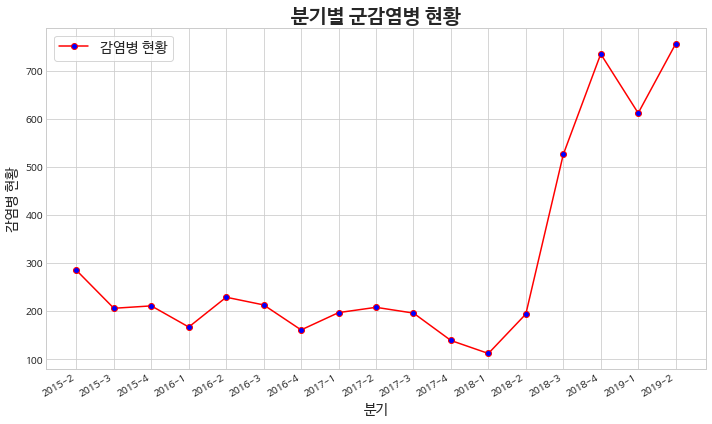

In [ ]:
# 그래프 스타일 지정하기
plt.style.use('seaborn-whitegrid')
plt.rc('font', family="NanumBarunGothic") # 한글 설정

# 그래프 속성 설정하기
fig, ax = plt.subplots(1, figsize=(10, 6))

# X축, Y축 데이터 지정하기
x = df_temp.분기
y = df_temp.현황

# 그래프 데이터와 속성 설정하기
plt.plot(x, y, color = 'red',  linestyle='-', marker='o',  mfc='blue')

fig.autofmt_xdate()

# 그래프 제목 및 속성 설정하기
plt.title('분기별 군감염병 현황', fontdict={'fontsize': 20, 'weight': 'bold'})

# X, Y축에 제목 설정하기
plt.xlabel('분기', fontdict={'fontsize': 14})
plt.ylabel('감염병 현황', fontdict={'fontsize': 14})

# 그래프안에 데이터 설명(레전드) 넣기
plt.legend(['감염병 현황'], frameon=True, fontsize='x-large')

plt.tight_layout()

---

### 3.2. 분기별 기온 시각화

이번에는 `월별 기온 정보` 에 있는 데이터를 분기별로 시각화합니다. 

`월별 기온 정보`를 확인해보면 각 지점별로 월평균기온 데이터를 확인할 수 있습니다.

DataFrame의 resample이라는 함수를 사용하면 기간별로 데이터를 쉽게 집계할 수 있습니다. 

분기별로 집계하기 위해서 'Q' 파리미터를 활용하겠습니다.

In [ ]:
df_temperature

,지점,지점명,일시,평균기온(°C)
0,12,안면도(감),2015-01-01,0.3
1,12,안면도(감),2015-02-01,1.4
2,12,안면도(감),2015-03-01,4.8
3,12,안면도(감),2015-04-01,11.1
4,12,안면도(감),2015-05-01,15.0
...,...,...,...,...
30281,980,강정,2019-08-01,26.4
30282,980,강정,2019-09-01,23.6
30283,980,강정,2019-10-01,18.8
30284,980,강정,2019-11-01,14.2


In [ ]:
# '일시' 열을 인덱스로 지정하기
df_temperature.set_index('일시', inplace=True)
df_temperature.head()

,지점,지점명,평균기온(°C)
일시,,,
2015-01-01,12,안면도(감),0.3
2015-02-01,12,안면도(감),1.4
2015-03-01,12,안면도(감),4.8
2015-04-01,12,안면도(감),11.1
2015-05-01,12,안면도(감),15.0


In [ ]:
# resample 메서드를 활용하여 분기별로 모든 관측지역의 평균 기온을 구하기
quarterly_data = round(df_temperature['평균기온(°C)'].resample('Q').mean(), 2)
quarterly_data.head()

일시
2015-03-31     2.38
2015-06-30    16.69
2015-09-30    22.63
2015-12-31     9.00
2016-03-31     2.08
Freq: Q-DEC, Name: 평균기온(°C), dtype: float64

In [ ]:
# 분기별 평균 기온 데이터 인덱스 재설정 하여 '일시' 데이터를 열로 만들기
quarterly_data = quarterly_data.reset_index()
quarterly_data.head()

,일시,평균기온(°C)
0,2015-03-31,2.38
1,2015-06-30,16.69
2,2015-09-30,22.63
3,2015-12-31,9.00
4,2016-03-31,2.08


In [ ]:
# '일시'컬럼의 데이터를 '분기'컬럼으로 저장하기
quarterly_data['분기'] = quarterly_data['일시'].dt.year.astype(str) + '-' + quarterly_data['일시'].dt.quarter.astype(str) 
quarterly_data.head()

,일시,평균기온(°C),분기
0,2015-03-31,2.38,2015-1
1,2015-06-30,16.69,2015-2
2,2015-09-30,22.63,2015-3
3,2015-12-31,9.00,2015-4
4,2016-03-31,2.08,2016-1


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


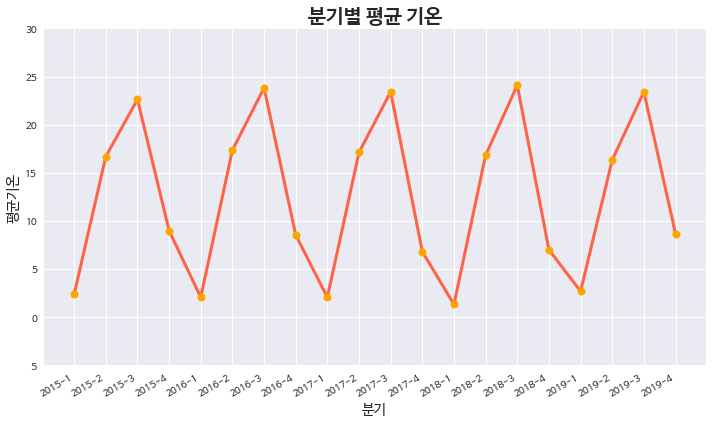

In [ ]:
# 그래프 스타일 지정하기
plt.style.use('seaborn')
plt.rc('font', family="NanumBarunGothic") # 한글 설정

# 그래프 속성 설정하기
fig, ax1 = plt.subplots(1, figsize=(10, 6))

# x, y축 데이터 설정하기
x = quarterly_data['분기']
y = quarterly_data['평균기온(°C)']

# y축 제한 설정하기
plt.ylim(-5, 30)

# 그래프 데이터와 속성 설정하기
plt.plot(x, y, color = 'tomato',  linestyle='-', marker='o',  mfc='orange', linewidth = 3, markersize = 8)

#plt.grid(axis = 'x')
fig.autofmt_xdate()

# 그래프 제목 및 속성 설정하기
plt.title('분기별 평균 기온', fontdict={'fontsize': 20, 'weight': 'bold'})

# X, Y축에 제목 설정하기
plt.xlabel('분기', fontdict={'fontsize': 14})
plt.ylabel('평균기온', fontdict={'fontsize': 14})

plt.tight_layout()

---

### 3.3. 분기별 감염병 현황과 평균 기온 시각화

이번에는 두 데이터를 합쳐서 시각화해봅니다.

In [ ]:
# 먼저 분기별 평균 기온 데이터를 확인합니다.
quarterly_data

,일시,평균기온(°C),분기
0,2015-03-31,2.38,2015-1
1,2015-06-30,16.69,2015-2
2,2015-09-30,22.63,2015-3
3,2015-12-31,9.00,2015-4
4,2016-03-31,2.08,2016-1
5,2016-06-30,17.35,2016-2
6,2016-09-30,23.83,2016-3
7,2016-12-31,8.55,2016-4
8,2017-03-31,2.07,2017-1
9,2017-06-30,17.12,2017-2


In [ ]:
# 다음으로 분기별 감염병 현황 데이터를 확인합니다.
df_temp

,연도,분기구분,현황,분기
0,2015,2,285,2015-2
1,2015,3,206,2015-3
2,2015,4,211,2015-4
3,2016,1,167,2016-1
4,2016,2,229,2016-2
5,2016,3,213,2016-3
6,2016,4,161,2016-4
7,2017,1,197,2017-1
8,2017,2,208,2017-2
9,2017,3,196,2017-3


두 데이터를 확인하면, 분기 데이터를 기준으로 두 데이터를 병합할 수 있습니다.

In [ ]:
df_merge = df_temp.merge(quarterly_data, how='left', on='분기')[['분기', '현황', '평균기온(°C)']]
df_merge

,분기,현황,평균기온(°C)
0,2015-2,285,16.69
1,2015-3,206,22.63
2,2015-4,211,9.00
3,2016-1,167,2.08
4,2016-2,229,17.35
5,2016-3,213,23.83
6,2016-4,161,8.55
7,2017-1,197,2.07
8,2017-2,208,17.12
9,2017-3,196,23.42


병합된 데이터프레임을 시각화 합니다.

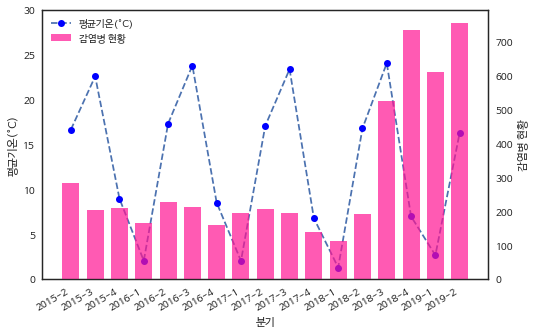

In [ ]:
# 데이터 설정하기
x = df_merge['분기']
y1 = df_merge['평균기온(°C)']
y2 = df_merge['현황']

plt.style.use('seaborn-white')
plt.rc('font', family="NanumBarunGothic") # 한글 설정

# 그래프 생성
fig, ax1 = plt.subplots()

# 선그래프로 평균 기온을 그려줍니다.
ax1.plot(x, y1, linestyle='--', marker='o',  mfc='blue', label='평균기온(°C)')
ax1.set_xlabel('분기')
ax1.set_ylabel('평균기온(°C)')
plt.ylim(0, 30)

# twinx 메서드를 활용하여 y축이 다른 막대 그래프를 그립니다.
ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='감염병 현황', alpha=0.7, width=0.7)
ax2.set_ylabel('감염병 현황')

# 
leg1, leg1_label = ax1.get_legend_handles_labels()
leg2, leg2_label = ax2.get_legend_handles_labels()
ax2.legend(leg1 + leg2, leg1_label + leg2_label)

fig.autofmt_xdate()

### 3.4. 감염병별 현황 시각화

감염병별 현황을 시각화하기 위해서 감염병 현황 데이터프레임 `df_disease`를 확인해보겠습니다.

In [ ]:
df_disease

,연도,분기구분,질병명,현황,비고
0,2018,4,홍 역,0,0
1,2018,4,유행성 이하선염,0,0
2,2018,4,수 두,19,0
3,2018,4,결 핵,17,0
4,2018,4,말라리아,3,0
...,...,...,...,...,...
246,2018,3,매 독,38,0
247,2018,3,폐 렴,434,0
248,2018,4,A형 간염,0,0
249,2018,4,세균성 이질,0,0


위 데이터프레임은 연도-분기-질병으로 데이터가 나열되어 있는데, 감염병 별로 데이터를 쉽게 확인하기 위해서 `groupby`함수를 써서 질병-연도-분기 형태도 변경하겠습니다. 

이때 `현황`데이터의 합계를 컬럼값으로 설정하였습니다.

In [ ]:
df_disease3 = df_disease.groupby(['질병명', '연도', '분기구분'])['현황'].sum()
df_disease3

질병명    연도    분기구분
A형 간염  2015  2        1
             3        7
             4        2
       2016  1       12
             2        5
                     ..
홍 역    2018  2        0
             3        0
             4        0
       2019  1        0
             2        2
Name: 현황, Length: 251, dtype: int64

위 데이터프레임의 인덱스를 재설정하여 아래와 같이 데이터를 만들어줍니다.

In [ ]:
df_temp2 = df_disease3.reset_index()
df_temp2

,질병명,연도,분기구분,현황
0,A형 간염,2015,2,1
1,A형 간염,2015,3,7
2,A형 간염,2015,4,2
3,A형 간염,2016,1,12
4,A형 간염,2016,2,5
...,...,...,...,...
246,홍 역,2018,2,0
247,홍 역,2018,3,0
248,홍 역,2018,4,0
249,홍 역,2019,1,0


`연도` 컬럼과 `분기구분` 컬럼 데이터를 합쳐서 `분기` 컬럼데이터를 생성하여 연도별-분기 데이터를 만들겠습니다.

In [ ]:
df_temp2['분기'] = df_temp2['연도'].astype(str) + '-' + df_temp2['분기구분'].astype(str)
df_temp2

,질병명,연도,분기구분,현황,분기
0,A형 간염,2015,2,1,2015-2
1,A형 간염,2015,3,7,2015-3
2,A형 간염,2015,4,2,2015-4
3,A형 간염,2016,1,12,2016-1
4,A형 간염,2016,2,5,2016-2
...,...,...,...,...,...
246,홍 역,2018,2,0,2018-2
247,홍 역,2018,3,0,2018-3
248,홍 역,2018,4,0,2018-4
249,홍 역,2019,1,0,2019-1


In [ ]:
# 감염병별로 현황을 비교하기 위해 피봇 테이블 생성하기
df_disease4 = df_temp2.pivot_table(values = '현황', index = '분기', columns = '질병명')
df_disease4.head()

질병명,A형 간염,결 핵,렙토스피라증,말라리아,매 독,세균성 이질,수 두,수막구균성 수막염,신증후군 출혈열,유행성 이하선염,장티푸스,쯔쯔가무시증,파상풍,폐 렴,홍 역
분기,,,,,,,,,,,,,,,
2015-2,1.0,82.0,1.0,83.0,28.0,0.0,38.0,0.0,12.0,35.0,0.0,5.0,0.0,0.0,0.0
2015-3,7.0,67.0,2.0,57.0,22.0,0.0,32.0,0.0,8.0,8.0,0.0,3.0,0.0,0.0,0.0
2015-4,2.0,80.0,0.0,8.0,13.0,0.0,45.0,0.0,25.0,11.0,0.0,27.0,0.0,0.0,0.0
2016-1,12.0,73.0,0.0,1.0,19.0,0.0,35.0,0.0,8.0,16.0,0.0,3.0,0.0,0.0,0.0
2016-2,5.0,69.0,1.0,72.0,16.0,0.0,29.0,0.0,3.0,27.0,0.0,7.0,0.0,0.0,0.0


감염병별 현황을 시각화하겠습니다.

Text(0, 0.5, '감염병 현황')

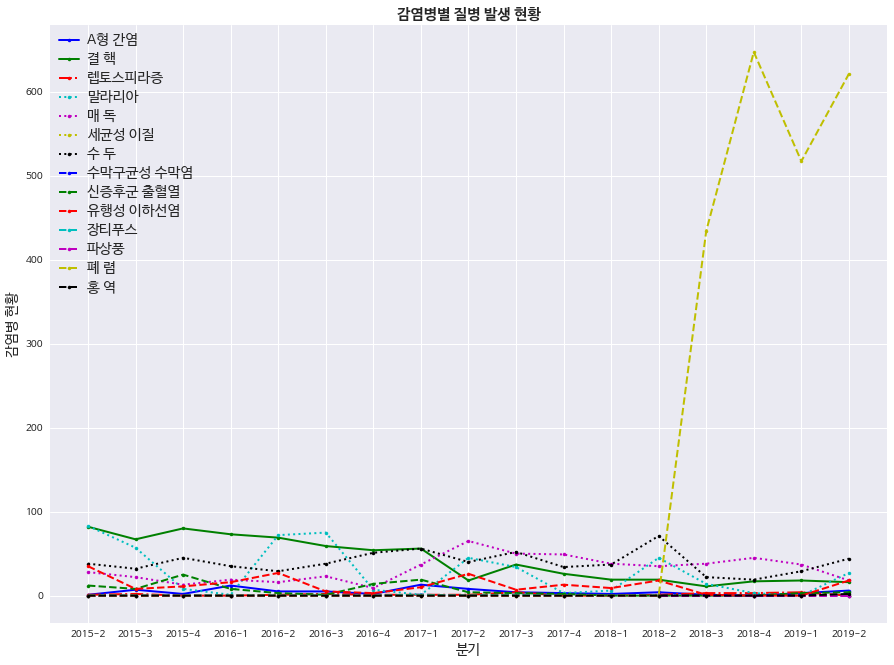

In [ ]:
# 그래프 스타일 지정하기
plt.style.use('seaborn')
plt.rc('font', family="NanumBarunGothic") # 한글 설정

# 그래프 속성 설정하기
fig, ax1 = plt.subplots(1, figsize=(15, 11))

# x, y축 데이터 설정하기
x = df_disease4.reset_index()['분기']

y_1 = df_disease4['A형 간염']
y_2 = df_disease4['결 핵']
y_3 = df_disease4['렙토스피라증']
y_4 = df_disease4['말라리아']
y_5 = df_disease4['매 독']
y_6 = df_disease4['세균성 이질']
y_7 = df_disease4['수 두']
y_8 = df_disease4['수막구균성 수막염']
y_9 = df_disease4['신증후군 출혈열']
y_10 = df_disease4['유행성 이하선염']
y_11 = df_disease4['장티푸스']
y_12 = df_disease4['파상풍']
y_13 = df_disease4['폐 렴']
y_14 = df_disease4['홍 역']

# 그래프 데이터와 속성 설정하기
plt.rc('font', family="NanumBarunGothic")
plt.plot(x, y_1, '.-b', label = 'A형 간염', linewidth = 2)
plt.plot(x, y_2, '.-g', label = '결 핵', linewidth = 2)
plt.plot(x, y_3, '.-.r', label = '렙토스피라증', linewidth = 2)
plt.plot(x, y_4, '.:c', label = '말라리아', linewidth = 2)
plt.plot(x, y_5, '.:m', label = '매 독', linewidth = 2)
plt.plot(x, y_6, '.:y', label = '세균성 이질', linewidth = 2)
plt.plot(x, y_7, '.:k', label = '수 두', linewidth = 2)
plt.plot(x, y_8, '.--b', label = '수막구균성 수막염', linewidth = 2)
plt.plot(x, y_9, '.--g', label = '신증후군 출혈열', linewidth = 2)
plt.plot(x, y_10, '.--r', label = '유행성 이하선염', linewidth = 2)
plt.plot(x, y_11, '.--c', label = '장티푸스', linewidth = 2)
plt.plot(x, y_12, '.--m', label = '파상풍', linewidth = 2)
plt.plot(x, y_13, '.--y', label = '폐 렴', linewidth = 2)
plt.plot(x, y_14, '.--k', label = '홍 역', linewidth = 2)

leg = plt.legend()
# 그래프안에 선별 데이터 설명(범주박스) 넣기
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

# 한꺼번에 선별 속성 
plt.setp(leg_lines, linewidth=2)
plt.setp(leg_texts, fontsize='x-large')

# 그래프 제목 및 속성 설정하기
plt.title('감염병별 질병 발생 현황', fontdict={'fontsize': 15, 'weight': 'bold'})

# X, Y축에 제목 설정하기
plt.xlabel('분기', fontdict={'fontsize': 14})
plt.ylabel('감염병 현황', fontdict={'fontsize': 14})

폐렴 데이터가 2018년도 3분기를 기준으로 많은 데이터 발생하고 있습니다.

In [ ]:
df_disease4['폐 렴']

분기
2015-2      0.0
2015-3      0.0
2015-4      0.0
2016-1      0.0
2016-2      0.0
2016-3      0.0
2016-4      0.0
2017-1      0.0
2017-2      0.0
2017-3      0.0
2017-4      0.0
2018-1      0.0
2018-2      0.0
2018-3    434.0
2018-4    647.0
2019-1    517.0
2019-2    621.0
Name: 폐 렴, dtype: float64

마지막으로 감염병 별로 시각화를 하겠습니다.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


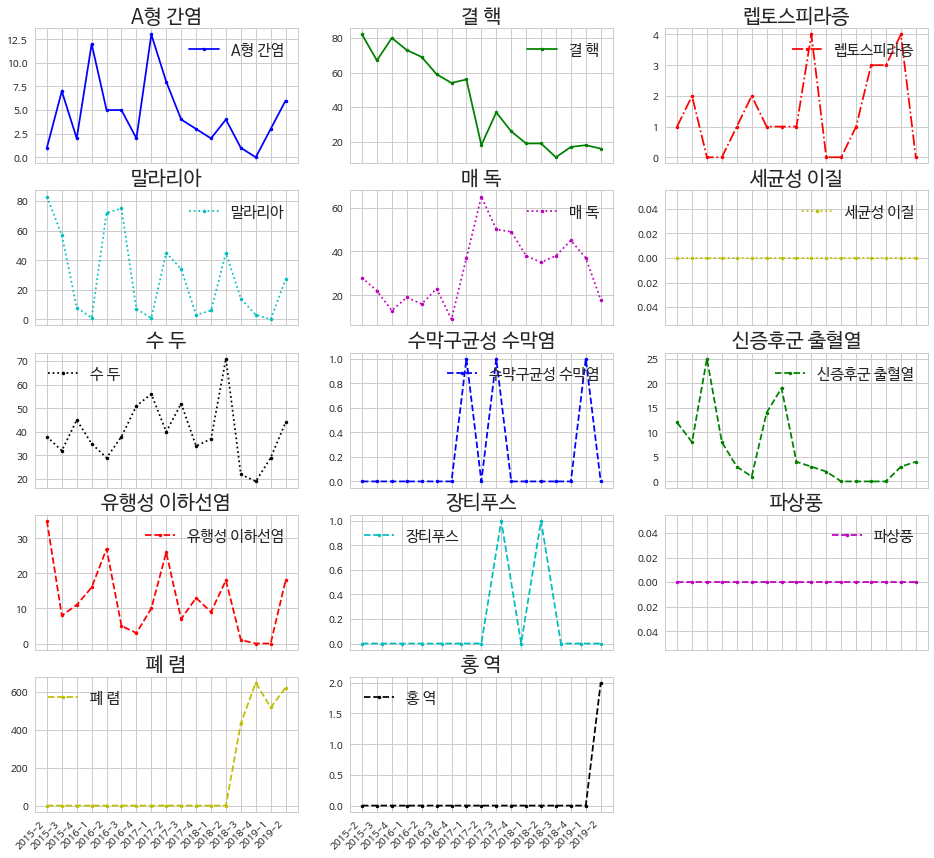

In [ ]:
# 그래프 스타일 지정하기
plt.style.use('seaborn-whitegrid')
plt.rc('font', family="NanumBarunGothic") # 한글 설정

# 14개의 감염병을 그려주기 위해서 row=5, column=3 으로 subplot을 설정합니다.
fig, axes = plt.subplots(5, 3, figsize=(16, 16))

# x, y축 데이터 설정하기
x = df_disease4.reset_index()['분기']

y_1 = df_disease4['A형 간염']
y_2 = df_disease4['결 핵']
y_3 = df_disease4['렙토스피라증']
y_4 = df_disease4['말라리아']
y_5 = df_disease4['매 독']
y_6 = df_disease4['세균성 이질']
y_7 = df_disease4['수 두']
y_8 = df_disease4['수막구균성 수막염']
y_9 = df_disease4['신증후군 출혈열']
y_10 = df_disease4['유행성 이하선염']
y_11 = df_disease4['장티푸스']
y_12 = df_disease4['파상풍']
y_13 = df_disease4['폐 렴']
y_14 = df_disease4['홍 역']

# 그래프 데이터와 속성 설정하기
axes[0][0].plot(x, y_1, '.-b', label = 'A형 간염')
axes[0][0].legend(fontsize=15)
axes[0][0].set_title('A형 간염', size=20)

axes[0][1].plot(x, y_2, '.-g', label = '결 핵')
axes[0][1].legend(fontsize=15)
axes[0][1].set_title('결 핵', size=20)

axes[0][2].plot(x, y_3, '.-.r', label = '렙토스피라증')
axes[0][2].legend(fontsize=15)
axes[0][2].set_title('렙토스피라증', size=20)

axes[1][0].plot(x, y_4, '.:c', label = '말라리아')
axes[1][0].legend(fontsize=15)
axes[1][0].set_title('말라리아', size=20)

axes[1][1].plot(x, y_5, '.:m', label = '매 독')
axes[1][1].legend(fontsize=15)
axes[1][1].set_title('매 독', size=20)

axes[1][2].plot(x, y_6, '.:y', label = '세균성 이질')
axes[1][2].legend(fontsize=15)
axes[1][2].set_title('세균성 이질', size=20)

axes[2][0].plot(x, y_7, '.:k', label = '수 두')
axes[2][0].legend(fontsize=15)
axes[2][0].set_title('수 두', size=20)

axes[2][1].plot(x, y_8, '.--b', label = '수막구균성 수막염')
axes[2][1].legend(fontsize=15)
axes[2][1].set_title('수막구균성 수막염', size=20)

axes[2][2].plot(x, y_9, '.--g', label = '신증후군 출혈열')
axes[2][2].legend(fontsize=15)
axes[2][2].set_title('신증후군 출혈열', size=20)

axes[3][0].plot(x, y_10, '.--r', label = '유행성 이하선염')
axes[3][0].legend(fontsize=15)
axes[3][0].set_title('유행성 이하선염', size=20)

axes[3][1].plot(x, y_11, '.--c', label = '장티푸스')
axes[3][1].legend(fontsize=15)
axes[3][1].set_title('장티푸스', size=20)

axes[3][2].plot(x, y_12, '.--m', label = '파상풍')
axes[3][2].legend(fontsize=15)
axes[3][2].set_title('파상풍', size=20)

axes[4][0].plot(x, y_13, '.--y', label = '폐 렴')
axes[4][0].legend(fontsize=15)
axes[4][0].set_title('폐 렴', size=20)

axes[4][1].plot(x, y_14, '.--k', label = '홍 역')
axes[4][1].legend(fontsize=15)
axes[4][1].set_title('홍 역', size=20)

axes[4][2].axis('off') # 빈 그래프를 그리지 않습니다.

fig.autofmt_xdate(rotation=45)

---

## 퀴즈

`A형 간염`병에 대한 현황과 평균 기온의 시각화하기 위한 데이터프레임을 df_result에 저장하세요.

2번째 줄의 None 부분에 알맞은 코드를 넣어 해결합니다.

In [ ]:
df_temp = df_disease4.reset_index()
df_result = df_temp.merge(quarterly_data, how='left', on='분기')[['분기', 'A형 간염', '평균기온(°C)']]
df_result

,분기,A형 간염,평균기온(°C)
0,2015-2,1.0,16.69
1,2015-3,7.0,22.63
2,2015-4,2.0,9.00
3,2016-1,12.0,2.08
4,2016-2,5.0,17.35
5,2016-3,5.0,23.83
6,2016-4,2.0,8.55
7,2017-1,13.0,2.07
8,2017-2,8.0,17.12
9,2017-3,4.0,23.42
